In [1]:
API_KEY = '93460c899b79357e8cdb17ceb3382e31d278813503c6f902be288590de05ecf2' 

In [2]:
import base64
import hashlib
import json
import requests
import vt
import nest_asyncio
import pandas as pd
import numpy as np

query = [
    "submitter:US and fs:2023-01-01+ and submissions:1 and (eset_nod32:filecoder or kaspersky:trojan-ransom) and not submitter:API and type:peexe"
]

In [3]:
nest_asyncio.apply()

In [4]:
df = pd.DataFrame(columns = ['hash', 'threat'])

In [5]:
cve = []
nh = 0
with vt.Client(API_KEY) as client:
    it = client.iterator('/intelligence/search',
        params={'query': query})
    with open('hashes.log','w') as f:
        for obj in it:
            if obj.id:
                f.write(f'{obj.id}\n')
                try:
                    print(obj.id, obj.popular_threat_classification['suggested_threat_label'])
                    df.loc[len(df.index)] = [obj.id, obj.popular_threat_classification['suggested_threat_label']]
                except:
                    df.loc[len(df.index)] = [obj.id, np.NaN]
                tags = [s for s in obj.tags]
                for index, item in enumerate(tags[:]):
                        if "cve" in item:
                            cve.append(item)
                nh += 1
    f.close()
print(f'{nh} hashes have been written to the file hashes.log\n')

70ce4b26246686e1d8d90687b8eb9fdde3c360d255501eb351e99d4fd12195a3 trojan.msil/passwordstealera
ea43332c0f8b57ab52808498dd213b601ffe36d4188624e0f56ecfdb28934e08 ransomware.lockbit/mint
6bb9502c9f0a1ee5bb35db1ba95f7e2c41f1121320992c9f845239637426c70b ransomware.blackcat/encoder
2725f393ef06383061ca7493457e8226202998ecdd3d03ff67051f6be93a8833 ransomware.blocker/zjji
1885d6f6dc912050803fca43e7da035cb8784bdb1cccb43a5dca5b1179316898 ransomware.conti/diavolo
5ededb6d1b815d7278d36052a32243958667baec9210b635b4c7050aff271222 trojan.marsilia/msil
973a310e8b14e509ce574b35f9eeb699be65a0fe97fb0f37c50dddb7e3710568 ransomware.cloudsword/msil
f62761961b6dc6607b75050a2cf5841c6ab7c7695db644c1e7dcbb61c06e8325 ransomware.msil/hydracrypt
96b2cb6009145e292e8fcde5d7c8a28e961a21b52edbd1ef308411d1e47eb139 ransomware.wannacry/wannacryptor
48c8ba2d5e18acbef60337e50ba20c6d350ff5e9c989df50ecb4c98c14e00b6d trojan.marsilia/msil
d551c6219a428da6d2056fd25e8dd1bdf39652c67be44ca7a446d5f30b6f6f5e ransomware.marsilia/msil
b

trojan.msil/blocker               22
trojan.marsilia/msil              16
ransomware.lockbit/blackmatter     9
trojan.convagent/graftor           7
ransomware.msil/hydracrypt         6
trojan.msil/crypren                5
ransomware.blackcat/esxiargs       5
ransomware.msil/chaos              4
trojan.filerepmalware/misc         4
trojan.msil/msilheracles           4
ransomware.gandcrab/gandcrypt      4
ransomware.phobos                  4
ransomware.lazy/msil               4
trojan.msil/asyncrat               4
trojan.python/filerepmalware       4
trojan.reverseshell/blocker        3
trojan.msil/msilmamut              3
trojan.msil/tiny                   3
ransomware.akira/ransomx           3
trojan.msil/zusy                   3
Name: threat, dtype: int64

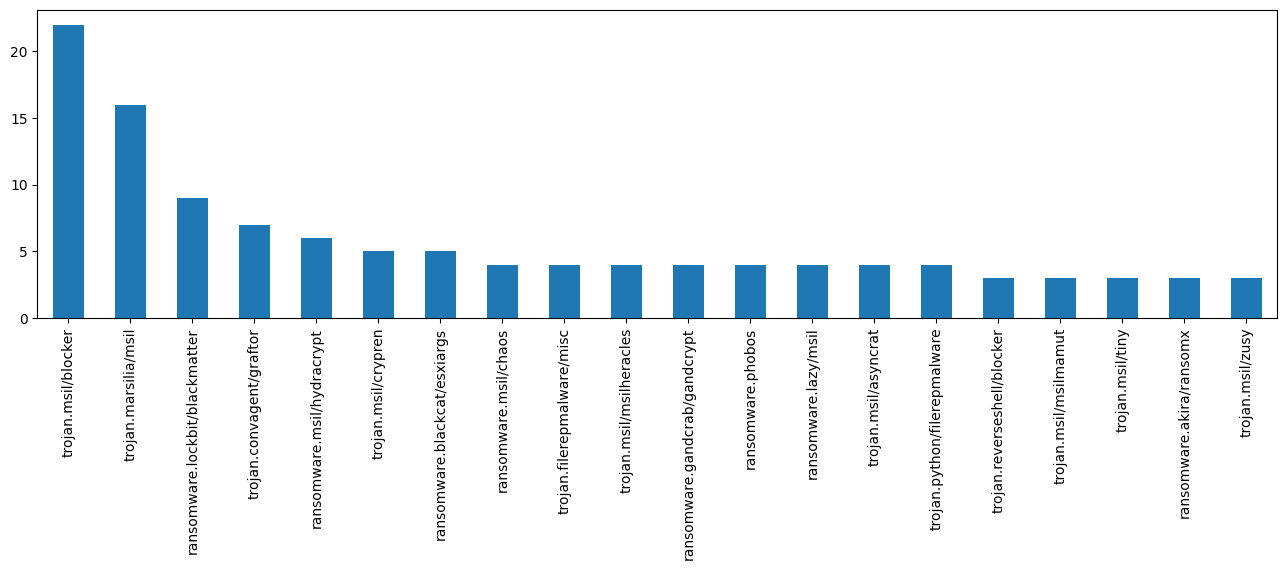

In [37]:
df['threat'].value_counts().nlargest(20).plot.bar(figsize=(16,4))
df['threat'].value_counts().nlargest(20)


In [ ]:
print(cve)

['cve-2016-2569', 'cve-2016-2569', 'cve-2017-0147', 'cve-2016-2569', 'cve-2016-2569', 'cve-2007-0774', 'cve-2010-3281', 'cve-2011-5007', 'cve-2016-7255', 'cve-2016-2569', 'cve-2016-2569', 'cve-2017-0147', 'cve-2017-0144', 'cve-2005-1206', 'cve-2017-0146', 'cve-2017-0143', 'cve-2016-2569']


In [27]:
import datetime
import sys
from pprint import pprint
import json


from intezer_sdk import api
from intezer_sdk.analysis import FileAnalysis

api.set_global_api('0b30bb17-2bd3-4e87-9c07-c7b19d5f4b58')

def get_latest_analysis_by_hash(file_hash: str):
    analysis = FileAnalysis(file_hash=file_hash)
    analysis.send(wait=True)
    return(analysis.result())

In [29]:
# Iterate over all unique hashes, look them up in Intezer and append the data to a new pandas dataframe called output

output = []
for i in df['hash']:
    print (i)
    try:
        response = get_latest_analysis_by_hash(i)
        print (response)
        output.append(response)
    except:
        continue

70ce4b26246686e1d8d90687b8eb9fdde3c360d255501eb351e99d4fd12195a3
{'analysis_id': '860d2383-0c9e-474f-961a-ceecd74242ee', 'analysis_time': 'Fri, 06 Oct 2023 13:22:23 GMT', 'analysis_url': 'https://analyze.intezer.com/analyses/860d2383-0c9e-474f-961a-ceecd74242ee', 'family_id': '09d4e8d5-e067-431f-ae90-593b8dd38edc', 'family_name': 'CockyGrabber', 'is_private': True, 'sha256': '70ce4b26246686e1d8d90687b8eb9fdde3c360d255501eb351e99d4fd12195a3', 'sub_verdict': 'known_malicious', 'verdict': 'malicious'}
ea43332c0f8b57ab52808498dd213b601ffe36d4188624e0f56ecfdb28934e08
{'analysis_id': '1c79adb9-7c60-4860-868f-04cc16755fd3', 'analysis_time': 'Fri, 06 Oct 2023 13:22:30 GMT', 'analysis_url': 'https://analyze.intezer.com/analyses/1c79adb9-7c60-4860-868f-04cc16755fd3', 'family_id': '62fca430-cd18-4d38-8be9-a50577478c7a', 'family_name': 'BlackMatter Ransomware', 'is_private': True, 'sha256': 'ea43332c0f8b57ab52808498dd213b601ffe36d4188624e0f56ecfdb28934e08', 'sub_verdict': 'malicious', 'verdict': '

                              analysis_id                  analysis_time  \
0    860d2383-0c9e-474f-961a-ceecd74242ee  Fri, 06 Oct 2023 13:22:23 GMT   
1    1c79adb9-7c60-4860-868f-04cc16755fd3  Fri, 06 Oct 2023 13:22:30 GMT   
2    8c380ce2-b51c-490b-a5a2-51de91f24751  Fri, 06 Oct 2023 13:22:41 GMT   
3    5b104b89-191c-43fd-b864-5cfd53a17942  Fri, 06 Oct 2023 13:22:50 GMT   
4    5a493ff2-bab5-499f-8ea2-1f7b4c33ca31  Fri, 06 Oct 2023 13:24:22 GMT   
..                                    ...                            ...   
343  bfbe6185-f24f-4a8b-9abd-8564fe4e72fb  Fri, 06 Oct 2023 23:44:00 GMT   
344  38b54b71-59a3-4e52-b6c5-28c32c15fa0a  Fri, 06 Oct 2023 23:45:50 GMT   
345  0db92755-b6b1-4edf-b881-d1d6ee7144f9  Fri, 06 Oct 2023 23:47:39 GMT   
346  4324b9f0-95ad-4eb1-b344-4017a0818e27  Fri, 06 Oct 2023 23:49:21 GMT   
347  d2dab142-1221-4a45-b22e-0c068773f245  Fri, 06 Oct 2023 23:50:55 GMT   

                                          analysis_url  \
0    https://analyze.intezer.

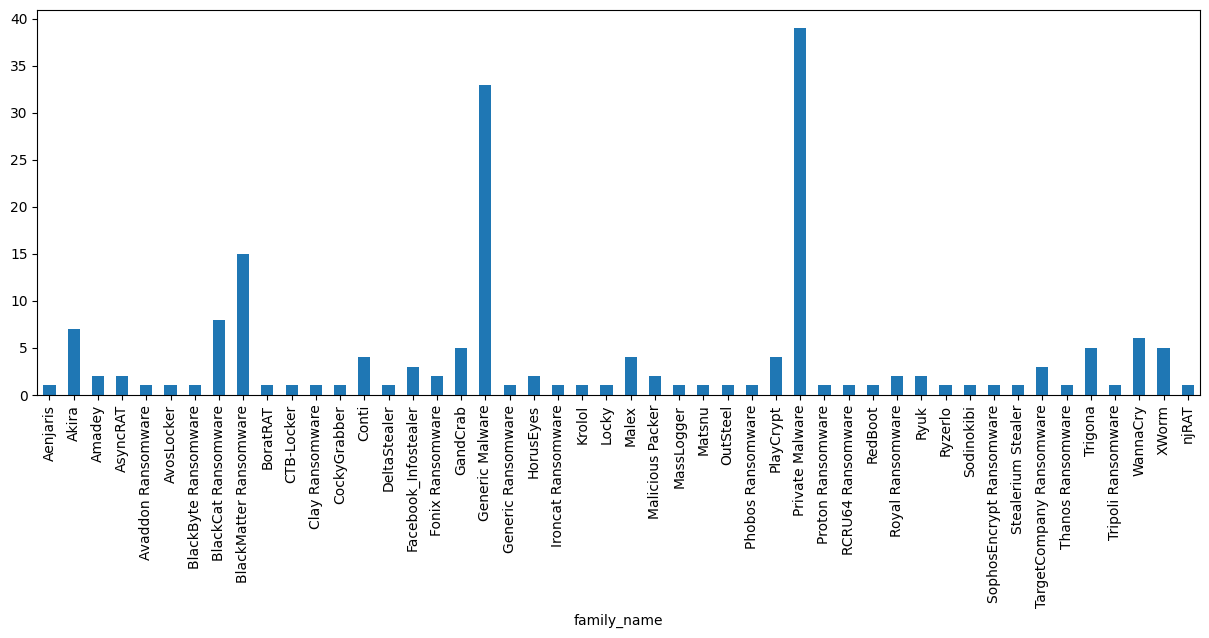

In [39]:
df2 = pd.DataFrame(output)
df2.analysis_id.nunique()

df2.groupby('family_name')['analysis_id'].nunique().plot(kind='bar',figsize=(15,5))

print(df2)

In [41]:
df2.groupby('family_name')['analysis_id'].nunique().nlargest(20)


family_name
Private Malware             39
Generic Malware             33
BlackMatter Ransomware      15
BlackCat Ransomware          8
Akira                        7
WannaCry                     6
GandCrab                     5
Trigona                      5
XWorm                        5
Conti                        4
Malex                        4
PlayCrypt                    4
Facebook_Infostealer         3
TargetCompany Ransomware     3
Amadey                       2
AsyncRAT                     2
Fonix Ransomware             2
HorusEyes                    2
Malicious Packer             2
Royal Ransomware             2
Name: analysis_id, dtype: int64

# VT Query

submitter:US and fs:2023-01-01+ and submissions:1 and (eset_nod32:filecoder or kaspersky:trojan-ransom) and not submitter:API and type:peexe

# VT Results

373 hashes have been written to the file hashes.log

## Top 20 families (based off VT tag)

![Alt text](image.png)

```
trojan.msil/blocker               22
trojan.marsilia/msil              16
ransomware.lockbit/blackmatter     9
trojan.convagent/graftor           7
ransomware.msil/hydracrypt         6
trojan.msil/crypren                5
ransomware.blackcat/esxiargs       5
ransomware.msil/chaos              4
trojan.filerepmalware/misc         4
trojan.msil/msilheracles           4
ransomware.gandcrab/gandcrypt      4
ransomware.phobos                  4
ransomware.lazy/msil               4
trojan.msil/asyncrat               4
trojan.python/filerepmalware       4
trojan.reverseshell/blocker        3
trojan.msil/msilmamut              3
trojan.msil/tiny                   3
ransomware.akira/ransomx           3
trojan.msil/zusy                   3
```

## CVEs from Top 20 families (based off VT tags)

['cve-2016-2569', 'cve-2016-2569', 'cve-2017-0147', 'cve-2016-2569', 'cve-2016-2569', 'cve-2007-0774', 'cve-2010-3281', 'cve-2011-5007', 'cve-2016-7255', 'cve-2016-2569', 'cve-2016-2569', 'cve-2017-0147', 'cve-2017-0144', 'cve-2005-1206', 'cve-2017-0146', 'cve-2017-0143', 'cve-2016-2569']

# Intezer Results

348 samples analyzed (some didn't get analyzed for some reason, maybe those were corrupt samples)

![Alt text](image-1.png)

```
family_name
Private Malware             39
Generic Malware             33
BlackMatter Ransomware      15
BlackCat Ransomware          8
Akira                        7
WannaCry                     6
GandCrab                     5
Trigona                      5
XWorm                        5
Conti                        4
Malex                        4
PlayCrypt                    4
Facebook_Infostealer         3
TargetCompany Ransomware     3
Amadey                       2
AsyncRAT                     2
Fonix Ransomware             2
HorusEyes                    2
Malicious Packer             2
Royal Ransomware             2
```